# Manjinder Sandhu
https://github.com/ManjinderUNCC/dsba6188--calm-code-4

# annoy

In [1]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552453 sha256=db2be60dcc8d861262a7c358b5d1e08a9a02563fdb96243dc8993ed4a9cef45c
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [2]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

In [5]:
columns = 2

vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

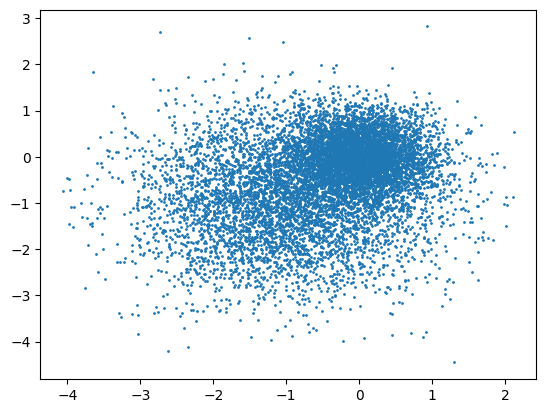

In [4]:
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

In [6]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

True

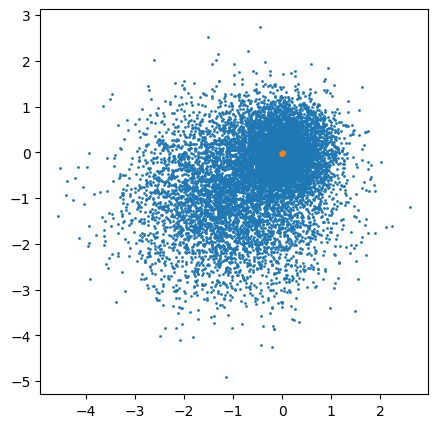

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-0., -0.]), 20)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);

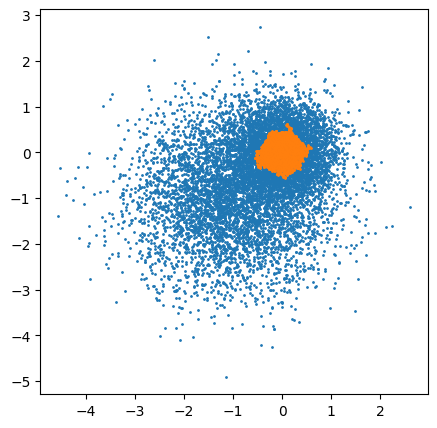

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-0., -0.]), 2000)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);

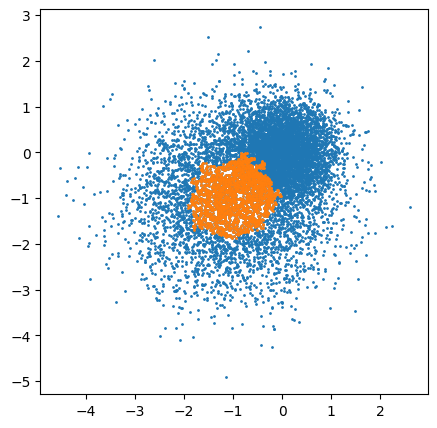

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);

In [16]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=10)

True

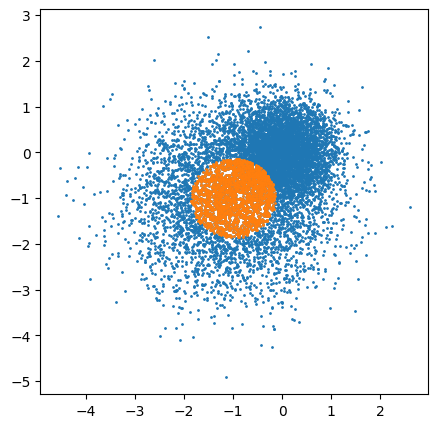

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);

In [18]:
from sklearn.neighbors import NearestNeighbors
query = np.array([-2., -2.])
q = np.array([query])
n = 10

In [19]:
nn = NearestNeighbors(n_neighbors=n, algorithm='ball_tree').fit(vecs)

In [20]:
%%timeit
distances, indices = nn.kneighbors(q)

358 µs ± 54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
nn = NearestNeighbors(n_neighbors=n, algorithm='kd_tree').fit(vecs)

In [22]:
%%timeit
distances, indices = nn.kneighbors(q)

331 µs ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
nn = NearestNeighbors(n_neighbors=n, algorithm='brute').fit(vecs)

In [24]:
%%timeit
distances, indices = nn.kneighbors(q)

805 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=10)

True

In [26]:
%%timeit
annoy.get_nns_by_vector(query, n)

13.1 µs ± 4.48 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

True

In [28]:
%%timeit
annoy.get_nns_by_vector(query, n)

The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
4.94 µs ± 2.75 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
columns = 2
vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

metric = 'euclidean'

annoy = AnnoyIndex(columns, metric)
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

True

In [30]:
annoy.save('test.ann')
annoy_from_disk = AnnoyIndex(columns, metric)
annoy_from_disk.load('test.ann')

True

# Lambda

In [31]:
def double(x):
    return x * 2

In [32]:
double(3)

6

In [33]:
triple = lambda x: x * 3

In [34]:
triple(3)

9

In [36]:
def double(x):
    return x * 2

In [38]:
number = 1
for func in [double, double, double]:
    number = func(number)
    print(number)

2
4
8


In [39]:
def add_one(x):
    return x + 1

In [40]:
number = 1
for func in [add_one, double, add_one]:
    number = func(number)
    print(number)

2
4
5


In [43]:
number = 1
for func in [lambda x: x + 1, lambda x: x * 2, lambda x: x + 2]:
    number = func(number)
    print(number)

2
4
6


In [42]:
number = 1
for func in [lambda x: x - 1, lambda x: x * 2, lambda x: x + 2]:
    number = func(number)
    print(number)

0
0
2


In [44]:
from functools import reduce

In [45]:
numbers = [1, 2, 3, 4, 5]

In [46]:
reduce(lambda x, y: x + y, numbers)

15

In [47]:
reduce(lambda x, y: x * y, numbers)

120

In [48]:
import numpy as np
import pandas as pd

In [50]:
df = pd.DataFrame(np.random.normal(0, 1, (10, 2)))
df.columns = ['column_a', 'column_b']
df

,column_a,column_b
0,-0.667089,0.600445
1,0.226851,-0.944141
2,0.226198,-1.042589
3,-0.411660,0.554771
4,0.269724,-1.050277
5,-0.405960,-0.740226
6,0.162995,-0.089454
7,0.447344,-0.116187
8,2.495737,2.015417
9,2.879175,-0.719886


In [51]:
df.loc[lambda d: d['column_b'] > 0]

,column_a,column_b
0,-0.667089,0.600445
3,-0.411660,0.554771
8,2.495737,2.015417
